In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import ASAP_PreProcess, TA_PreProcess, GS_PreProcess
from models import ABAE
from trainer import ABAE_trainer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_name = 'GS' # ['ASAP', 'TA']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
if data_name == 'ASAP':
    asap = ASAP_PreProcess()
    w2v_model, train_set, dev_set, test_set = asap.get_dataset()
elif data_name == 'TA':
    ta = TA_PreProcess()
    w2v_model, train_set, dev_set, test_set = ta.get_dataset()
elif data_name == 'GS':
    gs = GS_PreProcess()
    w2v_model, train_set, dev_set, test_set = gs.get_dataset()

N_vocab: 11359 | D_embed: 200 | N_aspects: 20


### Train

In [4]:
model = ABAE(w2v_model.E, w2v_model.T).to(device)
model

ABAE(
  (E): Embedding(11359, 200)
  (T): Embedding(20, 200)
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
)

In [5]:
epochs = 20
batch_size = 128
negsize = 20
trainer = ABAE_trainer(data_name=data_name)

Preparing...


44736it [00:31, 1412.02it/s]


TRAIN EPOCH: 1 | TRAIN-LOSS: 484.43964: 100%|████████████████████████████████████████| 279/279 [00:09<00:00, 30.30it/s]
VAL BATCH: 34 | VAL-LOSS: 529.08363: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 91.64it/s]


Coherence Score(10->50): [-160.16966247558594, -677.4061279296875, -1556.350341796875, -2744.97607421875, -4142.93505859375]


TRAIN EPOCH: 2 | TRAIN-LOSS: 406.12173: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 39.11it/s]
VAL BATCH: 34 | VAL-LOSS: 485.23865: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 90.19it/s]


Coherence Score(10->50): [-162.31594848632812, -680.0878295898438, -1558.244140625, -2724.577880859375, -4121.64697265625]


TRAIN EPOCH: 3 | TRAIN-LOSS: 408.32162: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 38.98it/s]
VAL BATCH: 34 | VAL-LOSS: 482.79650: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 92.14it/s]


Coherence Score(10->50): [-162.01380920410156, -673.1769409179688, -1545.77978515625, -2724.997314453125, -4120.2978515625]


TRAIN EPOCH: 4 | TRAIN-LOSS: 446.03699: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 39.33it/s]
VAL BATCH: 34 | VAL-LOSS: 473.96105: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 93.91it/s]


Coherence Score(10->50): [-160.04849243164062, -686.8779907226562, -1553.997802734375, -2744.270751953125, -4140.1669921875]


TRAIN EPOCH: 5 | TRAIN-LOSS: 444.31662: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 39.03it/s]
VAL BATCH: 34 | VAL-LOSS: 465.94260: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 92.89it/s]


Coherence Score(10->50): [-158.529541015625, -686.3407592773438, -1542.973388671875, -2731.04150390625, -4133.15234375]


TRAIN EPOCH: 6 | TRAIN-LOSS: 375.68826: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 39.04it/s]
VAL BATCH: 34 | VAL-LOSS: 443.39457: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 90.91it/s]


Coherence Score(10->50): [-159.58511352539062, -678.1920166015625, -1533.8165283203125, -2726.146240234375, -4121.05224609375]


TRAIN EPOCH: 7 | TRAIN-LOSS: 434.57391: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 38.86it/s]
VAL BATCH: 34 | VAL-LOSS: 441.19850: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 89.71it/s]


Coherence Score(10->50): [-159.8297882080078, -675.6692504882812, -1534.6595458984375, -2722.18701171875, -4121.052734375]


TRAIN EPOCH: 8 | TRAIN-LOSS: 401.91296: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 38.61it/s]
VAL BATCH: 34 | VAL-LOSS: 439.11342: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 88.55it/s]


Coherence Score(10->50): [-159.9512939453125, -678.7022705078125, -1537.255615234375, -2723.751953125, -4126.5732421875]


TRAIN EPOCH: 9 | TRAIN-LOSS: 404.09830: 100%|████████████████████████████████████████| 279/279 [00:07<00:00, 38.72it/s]
VAL BATCH: 34 | VAL-LOSS: 441.81028: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 88.09it/s]


Coherence Score(10->50): [-161.07421875, -677.0218505859375, -1536.46142578125, -2729.435546875, -4125.1845703125]


TRAIN EPOCH: 10 | TRAIN-LOSS: 408.37906: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.55it/s]
VAL BATCH: 34 | VAL-LOSS: 436.21579: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 90.43it/s]


Coherence Score(10->50): [-163.16665649414062, -674.1063232421875, -1533.0030517578125, -2724.097900390625, -4120.3623046875]


TRAIN EPOCH: 11 | TRAIN-LOSS: 441.44687: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.43it/s]
VAL BATCH: 34 | VAL-LOSS: 432.91786: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 88.32it/s]


Coherence Score(10->50): [-164.31369018554688, -677.4078979492188, -1535.7330322265625, -2732.388916015625, -4123.82373046875]


TRAIN EPOCH: 12 | TRAIN-LOSS: 370.35614: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.54it/s]
VAL BATCH: 34 | VAL-LOSS: 434.62409: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 87.64it/s]


Coherence Score(10->50): [-164.53968811035156, -677.6790771484375, -1536.509765625, -2732.98681640625, -4125.4375]


TRAIN EPOCH: 13 | TRAIN-LOSS: 396.08572: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.28it/s]
VAL BATCH: 34 | VAL-LOSS: 436.79106: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 89.48it/s]


Coherence Score(10->50): [-164.78390502929688, -678.34228515625, -1537.7587890625, -2734.469482421875, -4127.44287109375]


TRAIN EPOCH: 14 | TRAIN-LOSS: 457.32983: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.37it/s]
VAL BATCH: 34 | VAL-LOSS: 433.38565: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 90.19it/s]


Coherence Score(10->50): [-164.71482849121094, -678.452392578125, -1536.2913818359375, -2734.64208984375, -4127.65185546875]


TRAIN EPOCH: 15 | TRAIN-LOSS: 393.84326: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.35it/s]
VAL BATCH: 34 | VAL-LOSS: 434.77767: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 85.23it/s]


Coherence Score(10->50): [-165.36862182617188, -678.7615356445312, -1536.0155029296875, -2734.32080078125, -4127.5517578125]


TRAIN EPOCH: 16 | TRAIN-LOSS: 437.61978: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.43it/s]
VAL BATCH: 34 | VAL-LOSS: 432.05654: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 88.78it/s]


Coherence Score(10->50): [-165.3308868408203, -678.5518188476562, -1535.890380859375, -2734.318359375, -4127.40576171875]


TRAIN EPOCH: 17 | TRAIN-LOSS: 430.17526: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.74it/s]
VAL BATCH: 34 | VAL-LOSS: 435.01351: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 86.31it/s]


Coherence Score(10->50): [-165.3881378173828, -678.6151123046875, -1535.960693359375, -2734.38818359375, -4127.3876953125]


TRAIN EPOCH: 18 | TRAIN-LOSS: 414.52170: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.65it/s]
VAL BATCH: 34 | VAL-LOSS: 434.85812: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 88.32it/s]


Coherence Score(10->50): [-165.57247924804688, -678.8406982421875, -1536.186279296875, -2734.614013671875, -4127.61328125]


TRAIN EPOCH: 19 | TRAIN-LOSS: 377.89264: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.51it/s]
VAL BATCH: 34 | VAL-LOSS: 433.49635: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 89.48it/s]


Coherence Score(10->50): [-165.46505737304688, -678.718994140625, -1535.952392578125, -2734.142578125, -4126.94921875]


TRAIN EPOCH: 20 | TRAIN-LOSS: 400.29108: 100%|███████████████████████████████████████| 279/279 [00:07<00:00, 38.31it/s]
VAL BATCH: 34 | VAL-LOSS: 431.38514: 100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 89.24it/s]


Coherence Score(10->50): [-165.46505737304688, -678.718994140625, -1535.9593505859375, -2734.06640625, -4126.873046875]


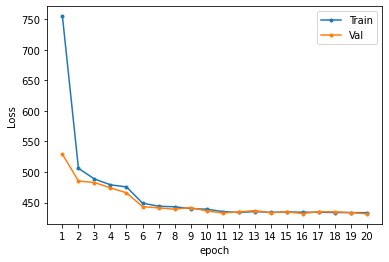

In [6]:
trainer.train(model=model, w2v_model=w2v_model, train_set=train_set, dev_set=dev_set, device=device, epochs=epochs, 
              batch_size=batch_size, negsize=negsize, ortho_reg=0.1, data_name=data_name, model_name='ABAE_' + str(seed))

### Test

In [6]:
model = ABAE(w2v_model.E, w2v_model.T).to(device)
model.load_state_dict(torch.load("./model_params/" + data_name + "_ABAE_" + str(seed) + "_20.model", map_location=device))
model.eval()

ABAE(
  (E): Embedding(11359, 200)
  (T): Embedding(20, 200)
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
)

In [7]:
trainer.test(model, test_set, batch_size=batch_size, device=device)

Th: 0.01000 | P: 0.96944 | R: 1.00000 | F1: 0.98448
Th: 0.01184 | P: 0.96944 | R: 1.00000 | F1: 0.98448
Th: 0.01367 | P: 0.96944 | R: 1.00000 | F1: 0.98448
Th: 0.01551 | P: 0.96943 | R: 0.99984 | F1: 0.98440
Th: 0.01735 | P: 0.96943 | R: 0.99968 | F1: 0.98432
Th: 0.01918 | P: 0.96949 | R: 0.99929 | F1: 0.98417
Th: 0.02102 | P: 0.96945 | R: 0.99779 | F1: 0.98341
Th: 0.02286 | P: 0.96942 | R: 0.99431 | F1: 0.98171
Th: 0.02469 | P: 0.96928 | R: 0.98712 | F1: 0.97812
Th: 0.02653 | P: 0.96909 | R: 0.97100 | F1: 0.97005
Th: 0.02837 | P: 0.96884 | R: 0.94817 | F1: 0.95839
Th: 0.03020 | P: 0.96848 | R: 0.91278 | F1: 0.93980
Th: 0.03204 | P: 0.96880 | R: 0.86103 | F1: 0.91174
Th: 0.03388 | P: 0.96903 | R: 0.79837 | F1: 0.87546
Th: 0.03571 | P: 0.96940 | R: 0.73090 | F1: 0.83342
Th: 0.03755 | P: 0.96849 | R: 0.65813 | F1: 0.78370
Th: 0.03939 | P: 0.96678 | R: 0.58410 | F1: 0.72823
Th: 0.04122 | P: 0.96567 | R: 0.51110 | F1: 0.66842
Th: 0.04306 | P: 0.96489 | R: 0.44300 | F1: 0.60721
Th: 0.04490 